In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#studentnummer: 1746125
p = 25000000 #De grootte van de populatie.
contacts_per_day = 61 #Het aantal contacten die per dag gemaakt worden.
chance_of_infection = 0.04 #De kans op een infectie per contact.

In [3]:
transmission = chance_of_infection/p*contacts_per_day #De transmissie coefficienten voor het berekenen van het aantal geïnfecteerde
infection_time = 5 #Het aantal dagen dat een persoon geïnfecteerd blijft.
latency = 2 #Het aantal dagen dat een persoon geïnfecteerd is maar geen andere mensen kan infecteren.

In [4]:
def sir_model(steps, h, exposed, s_start, i_start, r_start):
    t = np.zeros(steps+1)
    s = np.zeros(steps+1)
    if exposed:
        e = np.zeros(steps+1)
    i = np.zeros(steps+1)
    r = np.zeros(steps+1)
    
    s[0] = s_start
    i[0] = i_start
    r[0] = r_start
    
    for step in range(steps):
        new_s = -transmission * i[step] * s[step]
        if exposed:
            new_e = (transmission * i[step] * s[step]) - (1/latency * e[step])
        new_i = (transmission * i[step] * s[step]) - ((1/infection_time) * i[step])
        new_r = (1/infection_time)*(i[step])
        s[step+1] = s[step] + h * new_s
        if exposed:
            e[step+1] = e[step] + h * new_e
        i[step+1] = i[step] + h * new_i
        r[step+1] = r[step] + h * new_r
        t[step+1] = h*(step+1)
    if exposed:
        return t, s, e, i, r
    else:
        return t, s, i, r

<h2>SIR-Model voor mijn situatie</h2>

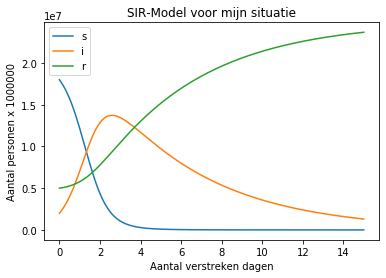

In [5]:
t, s, i, r = sir_model(150, 0.1, False, 18000000, 2000000, 5000000)
plt.plot(t, s)
plt.plot(t, i)
plt.plot(t, r)
plt.title("SIR-Model voor mijn situatie")
plt.xlabel("Aantal verstreken dagen")
plt.ylabel("Aantal personen x 1000000")
plt.legend(["s", "i", "r"])
plt.show()

<h2>Hoeveel mensen moeten gevaccineerd worden om een epidemie te voorkomen?</h2>

In [6]:
st = ((1/infection_time)/transmission)
percent_st = 100/p*st
percent_rt = 100-percent_st
amount_rt = p/100*percent_rt

Hier boven staan de berekeningen waar berekent word hoeveel mensen gevaccineerd moeten worden om een uitbraak te voorkomen, met de berekeningen van Udacity. Hier onder staat het antwoord van de berekening met daaronder hoe de ziekte verder verloopt.

In [7]:
amount_rt

22950819.672131147

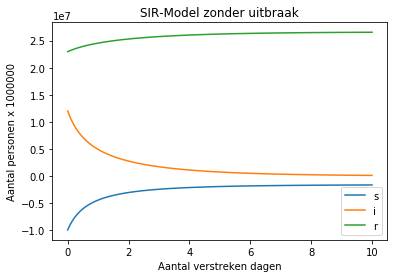

In [8]:
t, s, i, r = sir_model(100, 0.1, False, 13000000-amount_rt, 12000000, amount_rt)
plt.plot(t, s)
plt.plot(t, i)
plt.plot(t, r)
plt.title("SIR-Model zonder uitbraak")
plt.xlabel("Aantal verstreken dagen")
plt.ylabel("Aantal personen x 1000000")
plt.legend(["s", "i", "r"])
plt.show()

<h2>SEIR-Model met een latency van 2 dagen</h2>

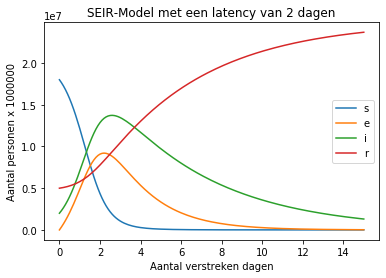

In [9]:
t, s, e, i, r = sir_model(150, 0.1, True, 18000000, 2000000, 5000000)
plt.plot(t, s)
plt.plot(t, e)
plt.plot(t, i)
plt.plot(t, r)
plt.title("SEIR-Model met een latency van 2 dagen")
plt.xlabel("Aantal verstreken dagen")
plt.ylabel("Aantal personen x 1000000")
plt.legend(["s", "e", "i", "r"])
plt.show()